# **PayTorch - Colores de caballos**

# API

In [21]:
VBox([widgets.Label('¡Seleccione tu caballo!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

# Instalación de los paquetes necesarios

In [2]:
!pip install -Uqq fastbook
!pip install fastai==2.5
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 720 kB 3.9 MB/s 
     |████████████████████████████████| 1.2 MB 37.9 MB/s 
     |████████████████████████████████| 48 kB 4.1 MB/s 
     |████████████████████████████████| 189 kB 47.0 MB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 51 kB 270 kB/s 
     |████████████████████████████████| 561 kB 37.6 MB/s 
     |████████████████████████████████| 130 kB 34.8 MB/s 
     |████████████████████████████████| 188 kB 4.2 MB/s 
     |████████████████████████████████| 831.4 MB 5.9 kB/s 
     |████████████████████████████████| 21.0 MB 1.5 MB/s 
     |████████████████████████████████| 23.2 MB 63.4 MB/s 
     |████████████████████████████████| 23.3 MB 1.6 MB/s 
     |████████████████████████████████| 23.3 MB 62.7 MB/s 
     |████████████████████████████████| 22.1 MB 1.4 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successful

# Conectamos con nuestro Drive para coger las fotos

In [3]:
path = Path('/content/gdrive/My Drive/caballos')

In [4]:
caballos = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

# Entrenamos y limpiamos el modelo

In [5]:
caballos = caballos.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = caballos.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


In [6]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

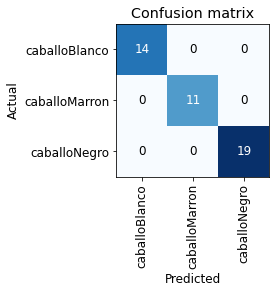

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [8]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [10]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

# Exportamos el entrenamiento

In [11]:
learn.export()

In [12]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [13]:
learn_inf = load_learner(path/'export.pkl')

# Creamos la app

In [16]:
out_pl = widgets.Output()
out_pl.clear_output()
out_pl

Output()

In [17]:
lbl_pred = widgets.Label()
lbl_pred.value = "Por favor, elija una imagen"
lbl_pred

Label(value='Por favor, elija una imagen')

In [18]:
btn_run = widgets.Button(description='Clasificarlo')
btn_run

Button(description='Clasificarlo', style=ButtonStyle())

In [19]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Predicción: {pred}; Probabilidad: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [20]:
btn_upload = widgets.FileUpload()